In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [20]:
# Load the rating data
rating_df = pd.read_csv("Data/Ratings.csv")
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [21]:
# Load the book data
book_df = pd.read_csv("Data/Books.csv", low_memory= False)
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [22]:
main_df = book_df.merge(rating_df, on= 'ISBN')
main_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [23]:
# Check for missing values
print("Number of missing values: \n",main_df.isnull().sum())

Number of missing values: 
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
dtype: int64


In [24]:
main_df.dropna(inplace=True)
main_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
dtype: int64

In [25]:
# Check for duplicates
main_df.duplicated().sum()

0

In [26]:
# Remove unwanted columns
main_df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], inplace=True, axis=1)
main_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [27]:
print(f"The shape of the recommendation dataset is {main_df.shape}")

The shape of the recommendation dataset is (1031129, 7)


In [28]:
# Finding unique users
unique_users = len(np.unique(main_df['User-ID']))
print(f"The number of unique users is {unique_users}")

The number of unique users is 92106


In [29]:
# Finding unique books
unique_books = len(np.unique(main_df['ISBN']))
print(f"The number of unique books is {unique_books}")

The number of unique books is 270145


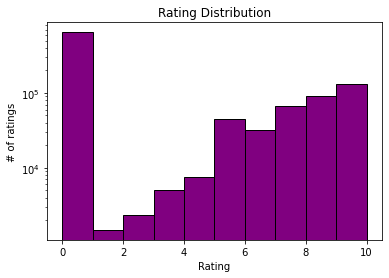

In [30]:
# Distribution of Ratings
plt.hist(main_df['Book-Rating'], bins=[0,1,2,3,4,5,6,7,8,9,10], log=True, color='purple', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('# of ratings')
plt.title('Rating Distribution')
plt.show()

As we can see, majority of the data has 0 ratings, we will remove those records as they won't contribute to our recommendation algorithm.

In [31]:
main_df.drop(main_df[main_df['Book-Rating'] == 0].index, inplace=True)

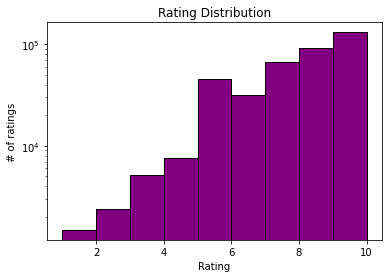

In [32]:
plt.hist(main_df['Book-Rating'], bins=[1,2,3,4,5,6,7,8,9,10], log=True, color='purple', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('# of ratings')
plt.title('Rating Distribution')
plt.show()

In [33]:
#  15 most popular books (items that have received the highest number of ratings)
px.bar(main_df['Book-Title'].value_counts().nlargest(15))

In [18]:
# 10 most popular publishers
px.bar(main_df['Publisher'].value_counts().nlargest(10))